In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append("..")
from modules.utils import paper_style
from sklearn.metrics import r2_score

paper_style()

from helper_fn import *

sys.path.append("..")

# from modules.utils import paper_style

# loading GT stuff

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = ""
relative_path = "../data"
path = os.path.join(current_dir, relative_path)
data_path = os.path.join(path, "test/")
data_drug_path = os.path.join(path, "test_drug/")
gt_path = os.path.join(path, "GT/")
gt_drug_path = os.path.join(path, "GT_drug/labels/")

drug = False

if drug:
    data_path_ = data_drug_path
    gt_path_ = gt_drug_path
else:
    data_path_ = data_path
    gt_path_ = gt_path

gt_tracks = []
taus = []
for i, fn in enumerate(os.listdir(gt_path_)):
    track = np.load(os.path.join(gt_path_, fn)).squeeze().T
    tau = np.linspace(0, 1, track.shape[0])
    gt_tracks.append(track)
    taus.append(tau)

crossing_points_gt, idx_gt = find_crossing_points(taus, gt_tracks)

track_lengths = [track.shape[0] for track in gt_tracks]

modalities = ["bf", "h2b"]


In [23]:
data = {}
errors_g = {}
errors_r = {}
for mod in modalities:
    data[mod] = {}
    errors_g[mod] = {}
    errors_r[mod] = {}
    for head in heads:
        # loading the dataset
        tracks = get_data(data_path_, mod, head)
        data[mod][head] = tracks

        # getting the mean error profile
        n_tracks = len(tracks)
        fucci_labels = ["green", "red"]

        errors_g_unrolled, errors_r_unrolled, taus_unrolled = track_errors_flattened(
            gt_tracks, tracks
        )

        errors_g_averaged, bins = bin_avarage_errors(errors_g_unrolled, taus_unrolled)
        errors_r_averaged, bins = bin_avarage_errors(errors_r_unrolled, taus_unrolled)

        errors_g[mod][head] = errors_g_averaged
        errors_r[mod][head] = errors_r_averaged

In [24]:
# subset of heads to plot
good_heads = ["mlp", "xtransformer-causal", "mamba", "xtransformer"]

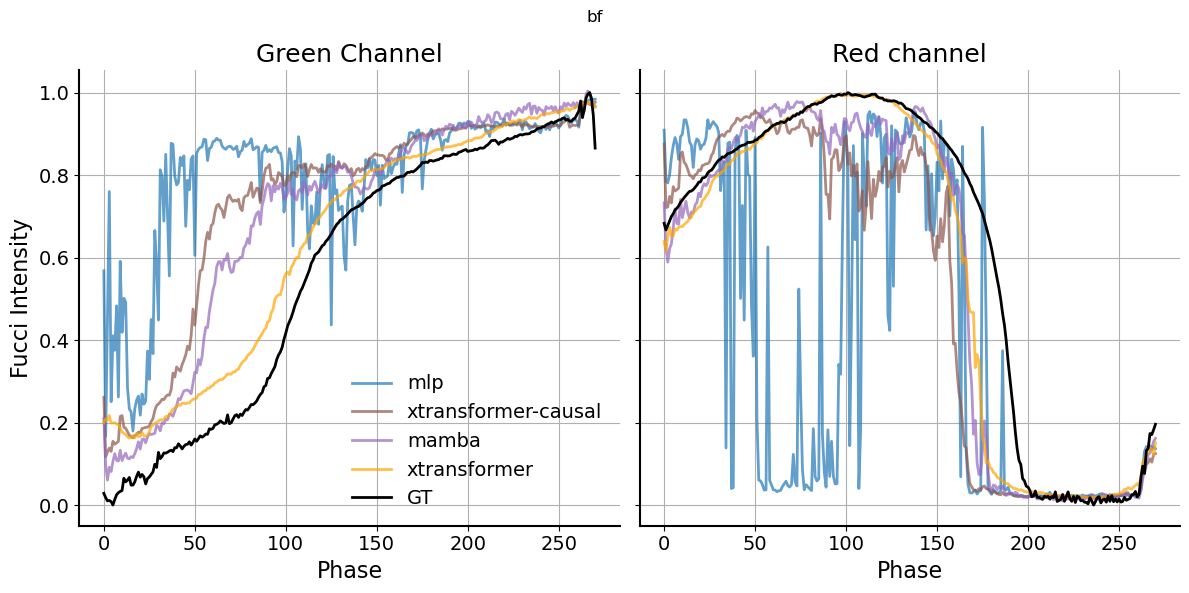

In [25]:
# choose modality here
mod = "bf"
# choose track here
idx = 119
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.suptitle(mod)

# Left subplot for errors_g_averaged
ax1.set_title("Green Channel")
ax1.set_xlabel("Phase")
ax1.set_ylabel("Fucci Intensity")


for head in good_heads:
    ax1.plot(data[mod][head][idx][:, 0], label=f"{head}", color=head_colors[head], alpha=0.7)

ax1.plot(gt_tracks[idx][:, 0], label="GT", color="black")
ax1.legend()
ax1.grid()

# Right subplot for errors_r_averaged
ax2.set_title("Red channel")
ax2.set_xlabel("Phase")

for head in good_heads:
    ax2.plot(data[mod][head][idx][:, 1], label=f"{head}", color=head_colors[head], alpha=0.7)

ax2.plot(gt_tracks[idx][:, 1], label="GT", color="black")

# ax2.legend()
ax2.grid()

# Ensure tight layout and consistent y-axis scaling
plt.tight_layout()

# save the figure
# plt.savefig(f"../plots/av_error/profile_{mod}.pdf")
plt.show()

## avarage error profile

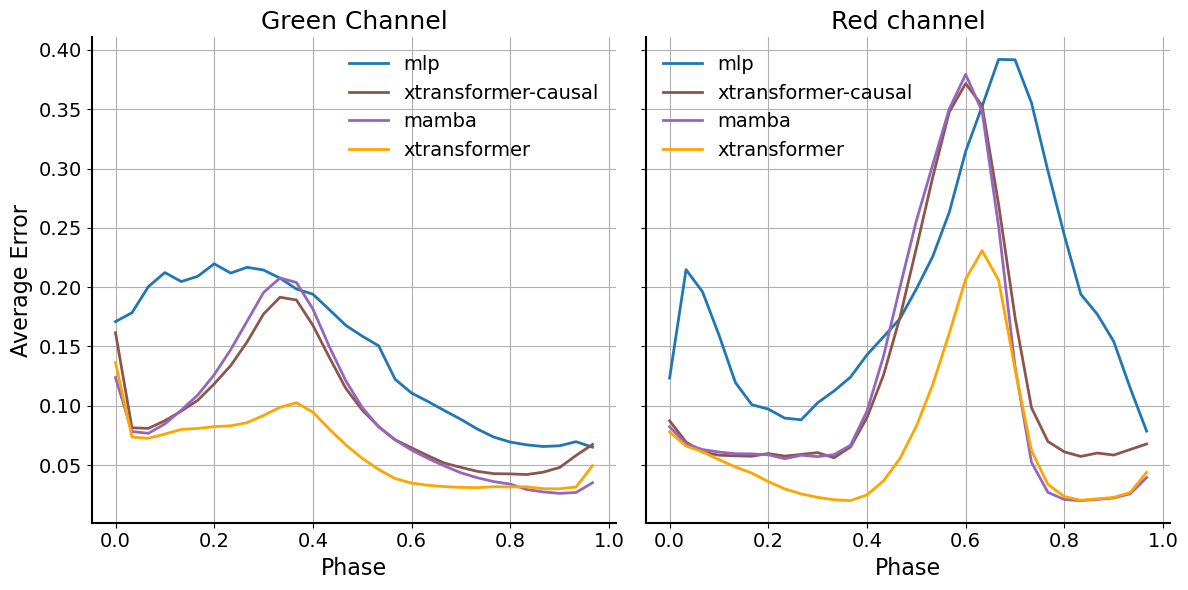

In [27]:
# Create the figure and subplots
mod = "bf"


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Left subplot for errors_g_averaged
ax1.set_title("Green Channel")
ax1.set_xlabel("Phase")
ax1.set_ylabel("Average Error")
for head in good_heads:
    errors_g_averaged = errors_g[mod][head]
    ax1.plot(bins[:-1], errors_g_averaged, label=f"{head}", color=head_colors[head])

ax1.legend()
ax1.grid()

# Right subplot for errors_r_averaged
ax2.set_title("Red channel")
ax2.set_xlabel("Phase")
for head in good_heads:
    errors_r_averaged = errors_r[mod][head]
    ax2.plot(bins[:-1], errors_r_averaged, label=f"{head}", color=head_colors[head])

ax2.legend()
ax2.grid()

# Ensure tight layout and consistent y-axis scaling
plt.tight_layout()


# save as pdf in ../plots/av_error
plt.savefig(f"../plots/av_error/av_error.pdf")
plt.show()

# drugs

Here I do the same thing, just switch the drug flag on

In [ ]:
# MAXINE! take the same code above and so the same plots


In [28]:
drug = True

if drug:
    data_path_ = data_drug_path
    gt_path_ = gt_drug_path
else:
    data_path_ = data_path
    gt_path_ = gt_path

data_d = {}
for mod in modalities:
    data_d[mod] = {}
    for head in heads:
        tracks = get_data(data_path_, mod, head)
        data_d[mod][head] = tracks

gt_tracks_d = []
taus_d = []
for i, fn in enumerate(os.listdir(gt_path_)):
    track = np.load(os.path.join(gt_path_, fn)).squeeze().T
    tau = np.linspace(0, 1, track.shape[0])
    gt_tracks_d.append(track)
    taus_d.append(tau)